<a href="https://colab.research.google.com/github/chin2yere/FDSfE_COffor/blob/main/HW7/HW7_NLP_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of Movie Reviews:
## Data - 
the data comes from the Kaggla challenge https://www.kaggle.com/code/yagli18/sentiment-analysis-on-movie-reviews and is comprosed of ~10k movie reviews and associated ratings. 
The challenge there is to create a model that predicts the rating based on the review, which is a Natural Language Processing sentiment analysis task. Sentiment analysis measures the "sentiment" (typically in a positive-to-negative linear scale) of a text. There are many issues with sentiment analysis in genera, and in particulat here, the "sentiment" of the review (negative, which is associated with sad and angry for example) may not match with the judgement on the quality of the movie (which may be sad, but good if it is a drama) 

**We will simply apply a pre-trained model that weights each word in the text to measure its negative-to-positive sentiment and compounds all the words to get an overall sentiment. The right way to do this tho would be to _train_ a new model on the data, learning the match between the sentiment of the words and the rating assigned by the author of the review. That way, the model is _specific_ to this data. This is a challenge that I live for you!**

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
import json
import pandas as pd

import numpy as np
import pylab as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [6]:
env = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = env["username"]
os.environ["KAGGLE_KEY"] = env["key"]

In [7]:
!kaggle datasets sentiment

usage: kaggle datasets [-h]
                       {list,files,download,create,version,init,metadata,status}
                       ...
kaggle datasets: error: argument command: invalid choice: 'sentiment' (choose from 'list', 'files', 'download', 'create', 'version', 'init', 'metadata', 'status')


In [8]:
!mkdir sentimentanalysis

mkdir: cannot create directory ‘sentimentanalysis’: File exists


In [9]:
cd sentimentanalysis/

/content/drive/MyDrive/sentimentanalysis


In [10]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

sentiment-analysis-on-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
!ls *

sampleSubmission.csv			 test.tsv.zip
sentiment-analysis-on-movie-reviews.zip  train.tsv.zip


In [12]:
!unzip  sentiment-analysis-on-movie-reviews.zip


Archive:  sentiment-analysis-on-movie-reviews.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [13]:
reviews = pd.read_csv("train.tsv.zip", sep="\t")
reviews

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [14]:
reviews = reviews.groupby("SentenceId").first()
reviews

,PhraseId,Phrase,Sentiment
SentenceId,,,
1,1,A series of escapades demonstrating the adage ...,1
2,64,"This quiet , introspective and entertaining in...",4
3,82,"Even fans of Ismail Merchant 's work , I suspe...",1
4,117,A positively thrilling combination of ethnogra...,3
5,157,Aggressive self-glorification and a manipulati...,1
...,...,...,...
8540,155985,... either you 're willing to go with this cla...,2
8541,155998,"Despite these annoyances , the capable Claybur...",2
8542,156022,-LRB- Tries -RRB- to parody a genre that 's al...,1


In [15]:
reviews.shape

(8529, 3)

In [16]:
reviews[["Phrase", "Sentiment"]].values

array([['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
        1],
       ['This quiet , introspective and entertaining independent is worth seeking .',
        4],
       ["Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",
        1],
       ...,
       ["-LRB- Tries -RRB- to parody a genre that 's already a joke in the United States .",
        1],
       ["The movie 's downfall is to substitute plot for personality .",
        1],
       ["The film is darkly atmospheric , with Herrmann quietly suggesting the sadness and obsession beneath Hearst 's forced avuncular chortles .",
        2]], dtype=object)

In [17]:
print('Number of Reviews/Documents: {}'.format(len(reviews)))

print('Corpus Size (words): {}'.format(np.sum([len(phrase.split()) for phrase in reviews["Phrase"].values])))

Number of Reviews/Documents: 8529
Corpus Size (words): 162044


In [18]:
reviews.Sentiment.unique()

array([1, 4, 3, 2, 0])

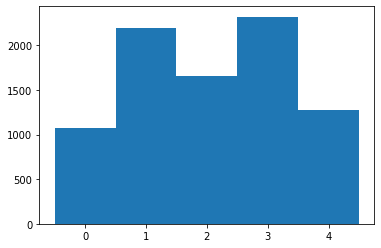

In [19]:
#plot sentiment histogram
plt.hist(reviews["Sentiment"], bins=[-0.5,0.5,1.5,2.5,3.5,4.5]);

The above histogram shows the distribution of the data about the different sentiment values. The height of the bars show the quantity of data that belongs to each sentiment value. From the above, we can see that the sentiment=3 is the largest category. filloed closely by sentiment=1. far behind in terms of size is sentiment=2 and behind, almost equally is 4 and 0.

In [20]:
!pip install stop_words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32912 sha256=e259f72d0e132e6a05af085abd35668d9dca8c0890981932390820302801378a
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [21]:
from nltk.tokenize import word_tokenize


In [22]:
!python -m nltk.downloader punkt

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [23]:
#NLP packs
import nltk
from nltk.tokenize import word_tokenize
#from nltk.corpus import stopwords
from stop_words import get_stop_words
#from textblob import TextBlob , Word
#import re 
#import string

In [24]:
#remove some characters like new line from the strings
reviews['Phrase'] = reviews['Phrase'].str.lower(
    ).str.replace(
        '[^\w\s]', '').str.replace(
            '\d+', '').str.replace(
                '\n',' ').replace(
                        '\r','').str.replace(
                            "[^a-zA-Z0-9\s]",'') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


# lets talk about the lambda construct and apply

In [25]:
reviews['Phrase'] = reviews['Phrase'].apply(lambda x:word_tokenize(x)) # sentence -> words
reviews['Phrase']

SentenceId
1       [a, series, of, escapades, demonstrating, the,...
2       [this, quiet, introspective, and, entertaining...
3       [even, fans, of, ismail, merchant, s, work, i,...
4       [a, positively, thrilling, combination, of, et...
5       [aggressive, selfglorification, and, a, manipu...
                              ...                        
8540    [either, you, re, willing, to, go, with, this,...
8541    [despite, these, annoyances, the, capable, cla...
8542    [lrb, tries, rrb, to, parody, a, genre, that, ...
8543    [the, movie, s, downfall, is, to, substitute, ...
8544    [the, film, is, darkly, atmospheric, with, her...
Name: Phrase, Length: 8529, dtype: object

# lets talk about stop words... and list comprehensions

In [26]:
from wordcloud import WordCloud, STOPWORDS
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [27]:
reviews["Phrase"] = reviews["Phrase"].apply(lambda x:[word for word in x if word not in STOPWORDS]) # stop words removal


# Frequency of words

In [28]:
nltk.FreqDist(reviews.Phrase.sum()).most_common(10)

[('s', 2558),
 ('film', 1150),
 ('movie', 969),
 ('nt', 680),
 ('one', 553),
 ('rrb', 352),
 ('lrb', 351),
 ('story', 347),
 ('will', 265),
 ('good', 264)]

In [29]:
reviews["Phrase"] = reviews["Phrase"].apply(lambda x : 
                  [word for word in x if word not in 
                   ["s", "nt", "rrb", "lrb", "one"]]) # more "stop" words 
# or I could do it by length: are there gpoing to be key words that are <4 characters??
reviews["Phrase"] = reviews["Phrase"].apply(lambda x : 
                  [word for word in x if len(word)>3]) # more "stop" words 


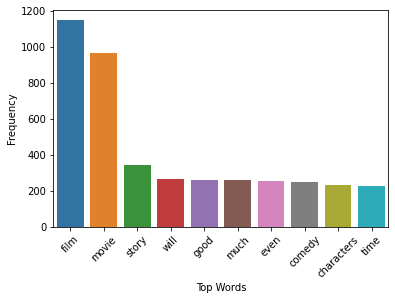

In [30]:
words_freq = pd.DataFrame(nltk.FreqDist(reviews.Phrase.sum(
                                          )).most_common(10), 
                          columns=['Top Words', 'Frequency'])
ax = sns.barplot(x="Top Words",y="Frequency",data=words_freq)
plt.xticks(rotation = 45); # Rotates X-Axis Ticks by 45-degrees


The above diagram is a frequency barchart. It shows the frequency of various top words in the phrases. The words are distinguished with color and their frequency is measured in hundreds on the y axis. From the bar above, film is the most frequent word followed by movie. They are way more frequent than other words.

# Lets talk about the str.join() method

In [31]:
def wc(data,bgcolor): # word cloud
    plt.figure(figsize=(10,10))
    wc = WordCloud(background_color=bgcolor, max_words=100, 
                 min_word_length=4, contour_width=3, 
                 contour_color='steelblue')
    wc.generate(" ".join(data)) # tum kelimeleri birlestirip tek 1 string haline getirir
    plt.imshow(wc)
    plt.axis("off")



#TASK 1 : 
Use the function above to plot the word cloud **for Sentiment==0**, comment on the plot to describe how a wordcloud should be read and what are interesting words that appear

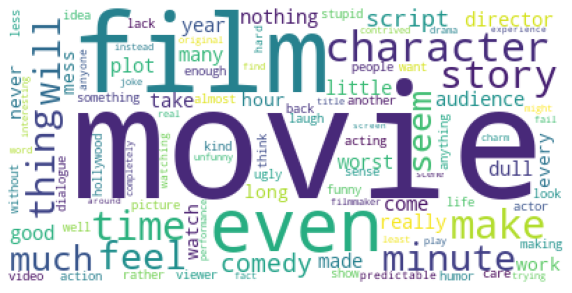

In [32]:
# your code here
#plot the word cloud for sentiment 0
wc(reviews[reviews["Sentiment"]==0]["Phrase"].sum(), bgcolor="white")

Word Clouds display a set of words in the form of a cloud. The more frequent a word appears in the text, the bigger it will become. From the word cloud above, we can see that the most interesting word is "movie". "film" is the second most common word and "even" is the next. other interesting words include "character", "story", "thing", "will", "time", "much", "feel", "minute", "make". 

#TASK 2 : 
Use the function above to plot the word cloud **for Sentiment==4**, comment on the plot to describe how a wordcloud should be read and what are interesting words that appear. How does it differ from Sentiment==0?

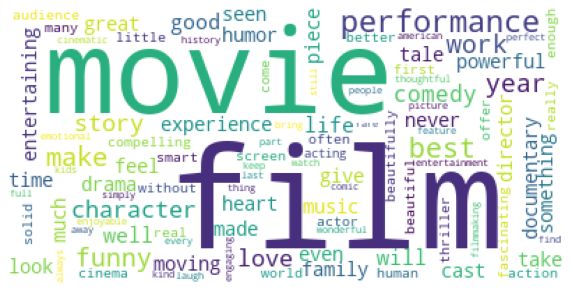

In [33]:
# your code here
#plot the word cloud for sentiment 4
wc(reviews[reviews["Sentiment"]==4]["Phrase"].sum(), bgcolor="white")

Word Clouds display a set of words in the form of a cloud. The more frequent a word appears in the text, the bigger it will become. From the word cloud above, we can see that the most interesting word is "film". "movie" is the second most common word and "performance" is the next. other interesting words include "character", "funny", "moving", "story", "best", "piece", "love", "documentary", "something". 

# Task 3: sentiment analysis

install a package that contains a pretrained model: this model will score every word in a sentence as positive or negative (with a continuous score from -1 to 1) and will then average over those words.

In [34]:
!pip install vaderSentiment


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 3.7 MB/s 


In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#remember to move this cell to the top: all imports should be in the top cell (as well as installs)

In [36]:
#create a model
sid_obj = SentimentIntensityAnalyzer() 
#apply the model to a string
sid_obj.polarity_scores("series escapades demonstrating adage good goose good gander occasionally amuses none amounts much story")
 

{'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'compound': 0.8024}

In [37]:
#define a function to generate the senriment given a string
def sentiment_vader(words):
  sid_obj = SentimentIntensityAnalyzer()
  sentiment_dict = sid_obj.polarity_scores(' '.join(words))
  return sentiment_dict['compound']


## TASK steps: 
1. take the review for each Sentiment column value (you can use Sentiment==0, Sentiment==1..... like you should have done for the wordclouds) 
2. for each Sentiment group calculate the sentiment of each Phrase, the mean sentiment across the Phrases, and the standard deviation over this mean
3. plot on the x axis the value of the Sentiment column [0, 1, 2, 3, 4]
4. plot on the y axis the _mean_ sentiment as measured by your code for all reviews with that Sentiment value in the dataset
5. include the errorbar on the measured sentiment (use plt.errorbar to do this)
6. Comment on the figure: what do you see? is the model good?

### hint: you may want to use a list comprehension to do this! the steps are not necessarily sequential: everything can be done with a single line of code. This is not required however

In [55]:
#reviews[reviews["Sentiment"]==1]["Phrase"].sum()
np.unique(reviews["Sentiment"])

array([0, 1, 2, 3, 4])

In [56]:
new_rev=reviews.groupby('Sentiment')

new_rev1=new_rev.get_group(1)
new_rev2=new_rev.get_group(2)
new_rev3=new_rev.get_group(3)
new_rev4=new_rev.get_group(4)
new_rev0=new_rev.get_group(0)

  
  

In [68]:
sentiment_vader(new_rev1["Phrase"].values[0])

0.8024

In [87]:
new_rev1.shape[0]


2200

In [79]:
ar=[]
for i in range(0,2200):
  ar.append(sentiment_vader(new_rev1["Phrase"].values[i]))
  


In [96]:
ar2=[]
for i in range(0,new_rev2.shape[0]):
  ar2.append(sentiment_vader(new_rev2["Phrase"].values[i]))

In [98]:
ar3=[]
for i in range(0,new_rev3.shape[0]):
  ar3.append(sentiment_vader(new_rev3["Phrase"].values[i]))

In [99]:
ar4=[]
for i in range(0,new_rev4.shape[0]):
  ar4.append(sentiment_vader(new_rev4["Phrase"].values[i]))

In [100]:
ar0=[]
for i in range(0,new_rev0.shape[0]):
  ar0.append(sentiment_vader(new_rev0["Phrase"].values[i]))

In [108]:
#ar0

In [104]:
means=[np.mean(ar0),np.mean(ar),np.mean(ar2),np.mean(ar3),np.mean(ar4)]
standards=[np.std(ar0),np.std(ar),np.std(ar2),np.std(ar3),np.std(ar4)]


In [105]:
for i in range(0,5):
  print("The mean sentiment for the group Sentiment={0} is {1}".format(i, means[i]))

The mean sentiment for the group Sentiment=0 is -0.1011803171641791
The mean sentiment for the group Sentiment=1 is 0.04557504545454546
The mean sentiment for the group Sentiment=2 is 0.11819631419939577
The mean sentiment for the group Sentiment=3 is 0.2938376130978027
The mean sentiment for the group Sentiment=4 is 0.4316010148321623


In [109]:
for i in range(0,5):
  print("The standard deviation of sentiments for the group Sentiment={0} is {1}".format(i, standards[i]))
  

The standard deviation of sentiments for the group Sentiment=0 is 0.43400971038415165
The standard deviation of sentiments for the group Sentiment=1 is 0.418367643390788
The standard deviation of sentiments for the group Sentiment=2 is 0.40860576450167463
The standard deviation of sentiments for the group Sentiment=3 is 0.41330127835456826
The standard deviation of sentiments for the group Sentiment=4 is 0.3866711730961799


In [114]:
x=[0,1,2,3,4]
x


[0, 1, 2, 3, 4]

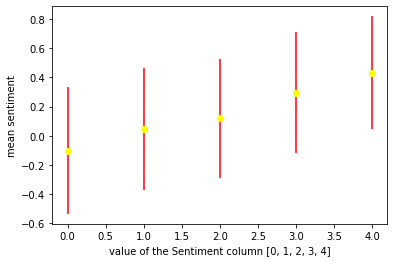

In [118]:
plt.errorbar(x, means, yerr = standards, fmt='o',ecolor = 'red',color='yellow');
plt.xlabel("value of the Sentiment column [0, 1, 2, 3, 4]")
plt.ylabel("mean sentiment");


From the above plot, I can conveniently say that the model is good. The plot shows the mean sentiments against the sentiment values. The errorbar shows the disparity of the different values about the mean. This gives us an idea of the region that contains all possible values of y in the actual data.